Consider the Catenoid surface

$$x(u, v)=a \cos (u) \cosh \left(\frac{v}{a}\right)$$
$$y(u, v)=a \sin (u) \cosh \left(\frac{v}{a}\right)$$
$$z(u, v)=v$$

First we try adding a simple assymetry


$$x(u, v)=a \cos (u) \cosh \left(\frac{v}{a}\right) + 0.5v \cos (u)$$
$$y(u, v)=a \sin (u) \cosh \left(\frac{v}{a}\right)+ 0.5v \sin (u)$$
$$z(u, v)=v$$

In [99]:
import numpy as np
from ddgclib import *
from ddgclib._complex import *
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._capillary_rise_flow import * #plot_surface#, curvature
from ddgclib._hyperboloid import *
from ddgclib._catenoid import *
from ddgclib._ellipsoid import *
from ddgclib._eos import *
from ddgclib._misc import *
from ddgclib._plotting import *

refinement = 4
v_l, v_u = -1.5, 1.5
#a, b, c = 1, 0.0, 1
a, b, c = 1, 0.0, 1
abc = (a, b, c)
a, b, c = abc  # Test for unit sphere

def sech(x):
    return 1 / np.cosh(x)

def catenoid(u, v):
    x = a * np.cos(u) * np.cosh(v / a) + 0.5 * v * np.cos(u)
    y = a * np.sin(u) * np.cosh(v / a) + 0.5 * v * np.sin(u)
    z = v 
    return x, y, z

In [100]:
R = a
domain = [#(-2.0, 2.0),  # u
          (0.0, 2 * np.pi),  # u
          (v_l, v_u)  # v
          ]
HC_plane = Complex(2, domain)
HC_plane.triangulate()
for i in range(refinement):
    HC_plane.refine_all()

# H
HC = Complex(3, domain)
bV = set()
cdist = 1e-8

u_list = []
v_list = []
for v in HC_plane.V:
    #print(f'-')
    #print(f'v.x = {v.x}')
    x, y, z = catenoid(*v.x_a)
    #print(f'tuple(x, y, z) = {tuple([x, y, z])}')
    v2 = HC.V[tuple([x, y, z])]

    u_list.append(v.x_a[0])
    v_list.append(v.x_a[1])

    #TODO: Does not work at all:
    boundary_bool = (
                    v.x[1] == domain[1][0] or v.x[1] == domain[1][1]
                    #v.x[2] == domain[0][0] or v.x[2] == domain[0][1]
                   # or v.x[1] == domain[1][0] or v.x[1] == domain[1][1]
                     )
    if boundary_bool:
        bV.add(v2)

# Connect neighbours
for v in HC_plane.V:
    for vn in v.nn:
        v1 = list(HC.V)[v.index]
        v2 = list(HC.V)[vn.index]
        v1.connect(v2)


# Remerge:
HC.V.merge_all(cdist=cdist)
bVc = copy.copy(bV)
for v in bVc:
    #print(f'bv = {v.x}')
    if not (v in HC.V):
        bV.remove(v)

for v in bV:
    pass
    #print(f'bv = {v.x}')

if 0:
    u_listc, v_listc = copy.copy(u_list), copy.copy(v_list)
    print(f'u_list = {u_list}')
    print(f'v_list = {v_list}')
    for u_i, v_i in zip(u_listc, v_listc):
        x, y, z = catenoid(u_i, v_i)
        print(f' -')
        print(f' tuple([x, y, z]) in HC.V.cache = {tuple([x, y, z]) in HC.V.cache}')

        # print(f'ind = {ind}')
        # if tuple(x, y, z)
        if not (tuple([x, y, z]) in HC.V.cache):
            # pass
            u_ind = u_list.index(u_i)
            v_ind = v_list.index(v_i)
            print(f'u_i = {u_i}')
            print(f'u_ind = {u_ind}')
            print(f'v_i = {v_i}')
            print(f'v_ind = {v_ind}')
            u_list.pop(u_ind)
            v_list.pop(v_ind)

    u = np.array(u_list)
    v = np.array(v_list)
    print(f'u = {u}')
    print(f'v = {v}')
    nom = c * (a**2*(u**2 - 1) + c**2 * (u**2 + 1))
    denom = 2 * a * (u**2 * (a**2 + c**2) + c**2)**(3/2.0)
    H_f = nom / denom
    K_f = - c**2 / ((u**2 * (a**2 + c**2) + c**2)**2)

    for ind, vert in enumerate(HC.V):
        print(f'-')
        print(f'ind = {ind}')
        print(f'v = {vert.x}')
        #x, y, z = hyperboloid(u[ind], v[ind])
        print(f'x, y, z =  {x, y, z}')

        nom = c * (a**2*(u**2 - 1) + c**2 * (u**2 + 1))
        denom = 2 * a * (u**2 * (a**2 + c**2) + c**2)**(3/2.0)


    for u_i, v_i in zip(u_list, v_list):
        x, y, z = hyperboloid(u_i, v_i)
        print(f' tuple([x, y, z]) in HC.V.cache = {tuple([x, y, z]) in HC.V.cache}')

        vert = HC.V[tuple([x, y, z])]
        print(f'vert.index = {vert.index}')
        #print(f'ind = {ind}')
        #if tuple(x, y, z)
        if not (tuple([x, y, z]) in HC.V.cache):
            print('WARRNIGN! not in cache')

H_f = []
bV_H_f = []
K_f = []
bV_K_f = []

neck_verts = []
neck_sols = []
for vert in HC.V:
    if not (vert in bV):
        for u_i, v_i in zip(u_list, v_list):
            x, y, z = catenoid(u_i, v_i)
            va = np.array([x, y, z])
            #print(f'va == vert.x_a = {va == vert.x_a}')
            ba = va == vert.x_a
            if ba.all():
                #print(f'ba.all() = {ba.all()}')
                u = u_i
                v = v_i
                #nom = c * (a ** 2 * (u ** 2 - 1) + c ** 2 * (u ** 2 + 1))
                #denom = 2 * a * (u ** 2 * (a ** 2 + c ** 2) + c ** 2) ** (3 / 2.0)
                H_f_i = 0.0
                #K_f_i = - c ** 2 / ((u ** 2 * (a ** 2 + c ** 2) + c ** 2) ** 2)
                #K_f_i = -(np.sech(v/a))**4 / (a**2)
                #K_f_i = -(math.sech(v/a))**4 / (a**2)
                K_f_i = -(sech(v/a))**4 / (a**2)
                H_f.append(H_f_i)
                K_f.append(K_f_i)
                #TODO: MERGE NEAR VERTICES

                if z == 0.0:
                    neck_verts.append(vert.index)
                    neck_sols.append((H_f_i, K_f_i))



<IPython.core.display.Javascript object>


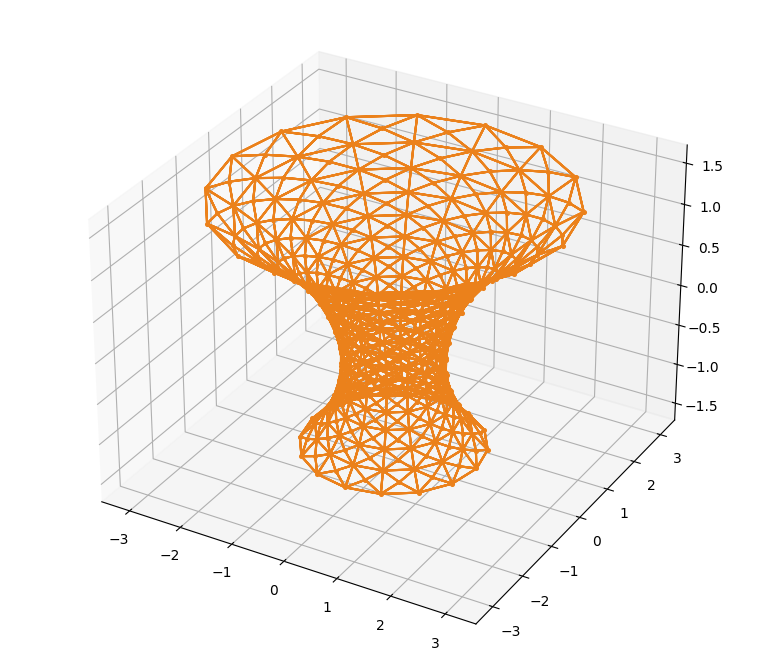

(<Figure size 640x480 with 1 Axes>, <Axes3D:>, None, None)

In [101]:
%matplotlib notebook
HC.plot_complex()

## Find the analytical mean curvature

For the special case of a surface defined as a function of two coordinates, e.g. $z=S(x,y)$

$$\begin{aligned} 2 H &=-\nabla \cdot\left(\frac{\nabla(z-S)}{|\nabla(z-S)|}\right) \\ &=\nabla \cdot\left(\frac{\nabla S-\nabla z}{\sqrt{1+|\nabla S|^2}}\right) \\ &=\frac{\left(1+\left(\frac{\partial S}{\partial x}\right)^2\right) \frac{\partial^2 S}{\partial y^2}-2 \frac{\partial S}{\partial x} \frac{\partial S}{\partial y} \frac{\partial^2 S}{\partial x \partial y}+\left(1+\left(\frac{\partial S}{\partial y}\right)^2\right) \frac{\partial^2 S}{\partial x^2}}{\left(1+\left(\frac{\partial S}{\partial x}\right)^2+\left(\frac{\partial S}{\partial y}\right)^2\right)^{3 / 2}} . \end{aligned}$$


### Implicit form of mean curvature 
The mean curvature of a surface specified by an equation $F(x, y, z)=0$ can be calculated by using the gradient $\nabla F=\left(\frac{\partial F}{\partial x}, \frac{\partial F}{\partial y}, \frac{\partial F}{\partial z}\right)$ and the Hessian matrix
$$
\operatorname{Hess}(F)=\left(\begin{array}{ccc}
\frac{\partial^2 F}{\partial x^2} & \frac{\partial^2 F}{\partial x \partial y} & \frac{\partial^2 F}{\partial x \partial z} \\
\frac{\partial^2 F}{\partial y \partial x} & \frac{\partial^2 F}{\partial y^2} & \frac{\partial^2 F}{\partial y \partial z} \\
\frac{\partial^2 F}{\partial z \partial x} & \frac{\partial^2 F}{\partial z \partial y} & \frac{\partial^2 F}{\partial z^2}
\end{array}\right)
$$
The mean curvature is given by: $[[][6]$
$$
H=\frac{\nabla F \operatorname{Hess}(F) \nabla F^{\top}-|\nabla F|^2 \operatorname{Trace}(\operatorname{Hess}(F))}{2|\nabla F|^3}
$$
Another form is as the divergence of the unit normal. A unit normal is given by $\frac{\nabla F}{|\nabla F|}$ and the mean curvature is
$$
H=-\frac{1}{2} \nabla \cdot\left(\frac{\nabla F}{|\nabla F|}\right)
$$

### Catenoid
First we see if we can obtain zero for the Catenoid with $a=1$:


$$x(u, v)= \cos (u) \cosh \left(v\right)$$
$$y(u, v)=\sin (u) \cosh \left(v\right)$$
$$z(u, v)=v$$


In [124]:
import sympy as sp
z, u, v = sp.symbols('z, u, v')

#F = Function('F')
x = sp.cos(u) * sp.cosh(v)
y = sp.sin(u) * sp.cosh(v)
z = v
F = (x, y, z)
F = sp.Matrix([x, y, z])
F

Matrix([
[cos(u)*cosh(v)],
[sin(u)*cosh(v)],
[             v]])

In [98]:
from sympy import *
import sympy
vec_norm = sqrt(sum(sympy.matrices.dense.matrix_multiply_elementwise(F, F)))
vec_norm

sqrt(v**2 + sin(u)**2*cosh(v)**2 + cos(u)**2*cosh(v)**2)

In [88]:
F.jacobian([u, v])

Matrix([
[-sin(u)*cosh(v), cos(u)*sinh(v)],
[ cos(u)*cosh(v), sin(u)*sinh(v)],
[              0,              1]])

In [90]:
F.hessian([u, v])

variables = [u, v]

AttributeError: 'MutableDenseMatrix' object has no attribute 'hessian'

In [91]:
 from sympy import ordered, Matrix, hessian
    

https://math.stackexchange.com/questions/1963999/surface-of-revolution-with-zero-mean-curvature


Consider your surface of revolution with the following parametrization, taking $z$ as the axis where the curve revolves,
$$
\mathbf{x}(u, v)=(f(u) \cos v, f(u) \sin v, g(u)) .
$$
As you pointed out, for a such a parametrization we can assume that $f(u)>0$, and also we can assume that the profile curve $u \mapsto(f(u), 0, g(u))$ is unit-speed, that is, $f^{\prime}(u)^2+g^{\prime}(u)^2=1$.
Then,
$$
\mathbf{x}_u=\left(f^{\prime}(u) \cos v, f^{\prime}(u) \sin v, g(u)\right), \mathbf{x}_v=(-f(u) \sin v, f(u) \cos v, 0) .
$$
Hence,
$$
\begin{aligned}
&E=\left\|\mathbf{x}_u\right\|^2=f^{\prime}(u)^2+g^{\prime}(u)^2=1 \\
&F=\left\langle\mathbf{x}_u, \mathbf{x}_v\right\rangle=0 \\
&G=\left\|\mathbf{x}_v\right\|^2=f(u)^2
\end{aligned}
$$

In [131]:
Func = F
Func.jacobian([u, v])
dF_u = Func.diff(u)
dF_v = Func.diff(v) 
dF_u, dF_v

(Matrix([
 [-sin(u)*cosh(v)],
 [ cos(u)*cosh(v)],
 [              0]]),
 Matrix([
 [cos(u)*sinh(v)],
 [sin(u)*sinh(v)],
 [             1]]))

In [132]:
E = sqrt(sum(sympy.matrices.dense.matrix_multiply_elementwise(dF_u, dF_u)))
E

sqrt(sin(u)**2*cosh(v)**2 + cos(u)**2*cosh(v)**2)

In [133]:
F = dF_u.dot(dF_v)
F

0

In [134]:
G = sqrt(sum(sympy.matrices.dense.matrix_multiply_elementwise(dF_v, dF_v)))
G

sqrt(sin(u)**2*sinh(v)**2 + cos(u)**2*sinh(v)**2 + 1)

We also have that
$$
\begin{aligned}
\mathbf{x}_u \times \mathbf{x}_v &=\left(-f(u) g^{\prime}(u) \cos v,-f(u) g^{\prime}(u) \sin v, f(u) f^{\prime}(u)\right), \\
\left\|\mathbf{x}_u \times \mathbf{x}_v\right\| &=f(u)
\end{aligned}
$$
$$
\begin{aligned}
\boldsymbol{N} &=\frac{\mathbf{x}_u \times \mathbf{x}_v}{\left\|\mathbf{x}_u \times \mathbf{x}_v\right\|}=\left(-g^{\prime}(u) \cos v,-g^{\prime}(u) \sin v, f^{\prime}(u)\right), \\
\mathbf{x}_{u u} &=\left(f^{\prime \prime}(u) \cos v, f^{\prime \prime}(u) \sin v, g^{\prime \prime}(u)\right) \\
\mathbf{x}_{u v} &=\left(-f^{\prime}(u) \sin v, f^{\prime}(u) \cos v, 0\right) \\
\mathbf{x}_{v v} &=\left(-f^{\prime}(u) \cos v,-f(u) \sin v, 0\right) \\
L &=\left\langle\mathbf{x}_{u u}, \boldsymbol{N}\right\rangle=f^{\prime}(u) g^{\prime \prime}(u)-f^{\prime \prime}(u) g^{\prime}(u) \\
M &=\left\langle\mathbf{x}_{u v}, \boldsymbol{N}\right\rangle=0 \\
N &=\left\langle\mathbf{x}_{v v}, \boldsymbol{N}\right\rangle=f(u) g^{\prime}(u)
\end{aligned}
$$
so the second fundamental form is
$$
\left(f^{\prime}(u) g^{\prime \prime}(u)-f^{\prime \prime}(u) g^{\prime}(u)\right) d u^2+f(u) g^{\prime}(u) d v^2
$$
Now, we use the well-known expression for $H$ given by
$$
H=\frac{1}{2} \frac{E N-2 F M+G L}{E G-F^2}
$$

In [139]:
ddF_uu = dF_u.diff(u)
ddF_vv = dF_v.diff(v) 
ddF_uv = dF_u.diff(v)
ddF_uv 

Matrix([
[-sin(u)*sinh(v)],
[ cos(u)*sinh(v)],
[              0]])

In [130]:
dF_v_cross_dF_u = dF_v.cross(dF_v)
ndF_v_cross_dF_u = sqrt(sum(sympy.matrices.dense.matrix_multiply_elementwise(dF_v_cross_dF_u
, dF_v_cross_dF_u
)))

N = dF_v_cross_dF_u / ndF_v_cross_dF_u
N


Matrix([
[0],
[0],
[0]])

In [141]:
L = ddF_uu.dot(N)
M = ddF_uv.dot(N)
N_scal = ddF_vv.dot(N)
N_scal

0

In [145]:
H = 0.5 * (E * N_scal - 2 * F * M + G * L) / (E*G - F**2)
H

0

# Assymetric case

Now lets repeat the computation with the assymetric case

$$
\begin{gathered}
x(u, v)=a \cos (u) \cosh \left(\frac{v}{a}\right)+0.5 v \cos (u) \\
y(u, v)=a \sin (u) \cosh \left(\frac{v}{a}\right)+0.5 v \sin (u) \\
z(u, v)=v
\end{gathered}
$$

In [5]:
from sympy import ordered, Matrix, hessian
import sympy as sp
z, u, v = sp.symbols('z, u, v')

#F = Function('F')
x = sp.cos(u) * sp.cosh(v) + 0.5 * v * sp.cos(u)
y = sp.sin(u) * sp.cosh(v) + 0.5 * v * sp.sin(u)
z = v
F = (x, y, z)
F = sp.Matrix([x, y, z])
F

Matrix([
[0.5*v*cos(u) + cos(u)*cosh(v)],
[0.5*v*sin(u) + sin(u)*cosh(v)],
[                            v]])

In [6]:
Func = F
Func.jacobian([u, v])
dF_u = Func.diff(u)
dF_v = Func.diff(v) 
dF_u, dF_v

(Matrix([
 [-0.5*v*sin(u) - sin(u)*cosh(v)],
 [ 0.5*v*cos(u) + cos(u)*cosh(v)],
 [                             0]]),
 Matrix([
 [cos(u)*sinh(v) + 0.5*cos(u)],
 [sin(u)*sinh(v) + 0.5*sin(u)],
 [                          1]]))

In [7]:
E = sqrt(sum(sympy.matrices.dense.matrix_multiply_elementwise(dF_u, dF_u)))
E

NameError: name 'sqrt' is not defined

In [8]:
F = dF_u.dot(dF_v)
F

(-0.5*v*sin(u) - sin(u)*cosh(v))*(cos(u)*sinh(v) + 0.5*cos(u)) + (0.5*v*cos(u) + cos(u)*cosh(v))*(sin(u)*sinh(v) + 0.5*sin(u))

In [9]:
G = sqrt(sum(sympy.matrices.dense.matrix_multiply_elementwise(dF_v, dF_v)))
G

NameError: name 'sqrt' is not defined

In [10]:
ddF_uu = dF_u.diff(u)
ddF_vv = dF_v.diff(v) 
ddF_uv = dF_u.diff(v)
ddF_uv 

Matrix([
[-sin(u)*sinh(v) - 0.5*sin(u)],
[ cos(u)*sinh(v) + 0.5*cos(u)],
[                           0]])

In [161]:
dF_v_cross_dF_u = dF_v.cross(dF_v)
ndF_v_cross_dF_u = sqrt(sum(sympy.matrices.dense.matrix_multiply_elementwise(dF_v_cross_dF_u
, dF_v_cross_dF_u
)))

N = dF_v_cross_dF_u / ndF_v_cross_dF_u
N


Matrix([
[0],
[0],
[0]])

In [162]:
L = ddF_uu.dot(N)
M = ddF_uv.dot(N)
N_scal = ddF_vv.dot(N)
N_scal

0

In [163]:
H = 0.5 * (E * N_scal - 2 * F * M + G * L) / (E*G - F**2)
H 

0